# Check of PTE calculation step 2

Christoph Braun, IMKTRO, KIT

In [6]:
exp='channel_2km_0004'
dt = 6
data_res  = '1x1latlon'
#data_res  = '0p05x0p05latlon'
if   dt == 1:
     data_dt = '1hrly'
elif dt == 6:
     data_dt = '6hrly'
        
p2level=50


In [4]:
import xarray as xr

In [9]:
ipath = '/work/bb1152/Module_A/A6_CyclEx/b380782_Christoph/temp_PTE_out/PTE/maps/'

ifile = "PTE_map_for_"+exp+"_"+data_dt+"_"+data_res+"_upper"+str(int(p2level))+"hPa_day*.nc"
ifile_orig = "PTE_map_for_"+exp+"_"+data_dt+"_"+data_res+"_upper"+str(int(p2level))+"hPa.nc"

# read the data
data_file= ipath+ifile
data_file_orig= ipath+ifile_orig

In [8]:
ds = xr.open_mfdataset(data_file)

In [10]:
ds_orig = xr.open_dataset(data_file_orig)

In [11]:
ds

<xarray.Dataset>
Dimensions:   (lon: 51, lat: 65, time: 30)
Coordinates:
  * lon       (lon) float32 12.5 13.5 14.5 15.5 16.5 ... 59.5 60.5 61.5 62.5
  * lat       (lat) float32 15.5 16.5 17.5 18.5 19.5 ... 76.5 77.5 78.5 79.5
  * time      (time) float32 1.75 2.0 2.25 2.5 2.75 ... 8.0 8.25 8.5 8.75 9.0
Data variables:
    mslp      (time, lat, lon) float32 dask.array<chunksize=(1, 65, 51), meta=np.ndarray>
    dpsfc_dt  (time, lat, lon) float32 dask.array<chunksize=(1, 65, 51), meta=np.ndarray>
    dfi_dt    (time, lat, lon) float32 dask.array<chunksize=(1, 65, 51), meta=np.ndarray>
    EP        (time, lat, lon) float32 dask.array<chunksize=(1, 65, 51), meta=np.ndarray>
    ITT       (time, lat, lon) float32 dask.array<chunksize=(1, 65, 51), meta=np.ndarray>
    Eq1res    (time, lat, lon) float32 dask.array<chunksize=(1, 65, 51), meta=np.ndarray>
    TADV      (time, lat, lon) float32 dask.array<chunksize=(1, 65, 51), meta=np.ndarray>
    VMT       (time, lat, lon) float32 dask.array<chunksize=(1, 65, 51), meta=np.ndarray>
    DIABres   (time, lat, lon) float32 dask.array<chunksize=(1, 65, 51), meta=np.ndarray>
Attributes:
    description:  PTE data

In [12]:
ds_orig

<xarray.Dataset>
Dimensions:   (lon: 51, lat: 65, lev: 100, time: 31)
Coordinates:
  * lon       (lon) float32 12.5 13.5 14.5 15.5 16.5 ... 59.5 60.5 61.5 62.5
  * lat       (lat) float32 15.5 16.5 17.5 18.5 19.5 ... 76.5 77.5 78.5 79.5
  * lev       (lev) float32 1e+03 2e+03 3e+03 4e+03 ... 9.8e+04 9.9e+04 1e+05
  * time      (time) float32 1.5 1.75 2.0 2.25 2.5 ... 8.0 8.25 8.5 8.75 9.0
Data variables:
    mslp      (time, lat, lon) float32 ...
    dpsfc_dt  (time, lat, lon) float32 ...
    dfi_dt    (time, lat, lon) float32 ...
    EP        (time, lat, lon) float32 ...
    ITT       (time, lat, lon) float32 ...
    Eq1res    (time, lat, lon) float32 ...
    TADV      (time, lat, lon) float32 ...
    VMT       (time, lat, lon) float32 ...
    DIABcomp  (time, lat, lon) float32 ...
    Eq2res    (time, lat, lon) float32 ...
    DIABres   (time, lat, lon) float32 ...
    TADV_3D   (time, lev, lat, lon) float32 ...
Attributes:
    description:  PTE data

In [13]:
ds.time

<xarray.DataArray 'time' (time: 30)>
array([1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 ,
       4.75, 5.  , 5.25, 5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 ,
       7.75, 8.  , 8.25, 8.5 , 8.75, 9.  ], dtype=float32)
Coordinates:
  * time     (time) float32 1.75 2.0 2.25 2.5 2.75 3.0 ... 8.0 8.25 8.5 8.75 9.0
Attributes:
    long_name:  time

In [14]:
ds_orig.time

<xarray.DataArray 'time' (time: 31)>
array([1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25,
       4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25,
       7.5 , 7.75, 8.  , 8.25, 8.5 , 8.75, 9.  ], dtype=float32)
Coordinates:
  * time     (time) float32 1.5 1.75 2.0 2.25 2.5 2.75 ... 8.0 8.25 8.5 8.75 9.0
Attributes:
    long_name:  time

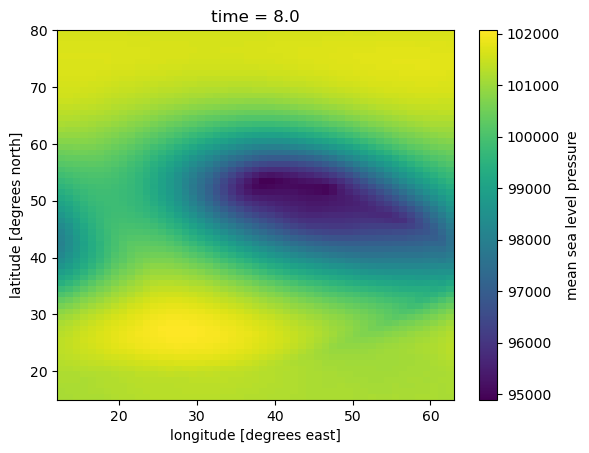

In [15]:
ds.sel(time=8).mslp.plot()

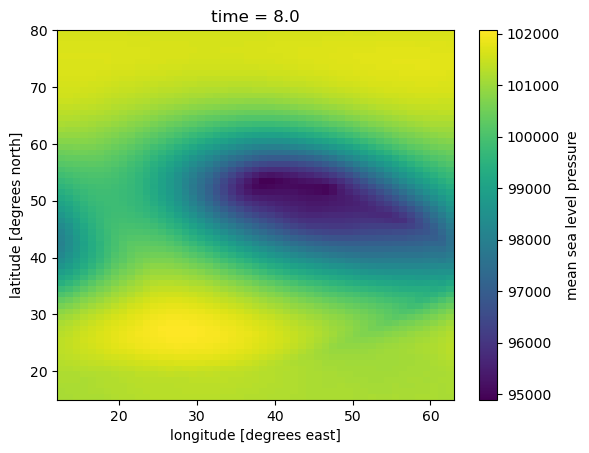

In [16]:
ds_orig.sel(time=8).mslp.plot()

In [26]:
ds_vars = list(ds.keys())

In [27]:
ds_vars

['mslp', 'dpsfc_dt', 'dfi_dt', 'EP', 'ITT', 'Eq1res', 'TADV', 'VMT', 'DIABres']

In [31]:
for var in ds_vars:
    print(var)
    for itime in range(0,30):
        val = (ds.isel(time=itime)[var]-ds_orig.isel(time=itime+1)[var]).max().values
        
        if val!=0:
            print((ds.isel(time=itime)[var]-ds_orig.isel(time=itime+1)[var]).max().values)

mslp
dpsfc_dt
dfi_dt
EP
nan
2.3841858e-07
4.7683716e-07
9.536743e-07
1.9073486e-06
3.8146973e-06
3.8146973e-06
7.6293945e-06
3.8146973e-06
7.6293945e-06
7.6293945e-06
7.6293945e-06
7.6293945e-06
7.6293945e-06
7.6293945e-06
7.6293945e-06
7.6293945e-06
7.6293945e-06
7.6293945e-06
1.9073486e-06
7.6293945e-06
7.6293945e-06
3.8146973e-06
7.6293945e-06
3.8146973e-06
3.8146973e-06
3.8146973e-06
3.8146973e-06
1.9073486e-06
1.9073486e-06
ITT
Eq1res
nan
3.8146973e-06
3.8146973e-06
3.8146973e-06
3.8146973e-06
7.6293945e-06
7.6293945e-06
7.6293945e-06
1.1444092e-05
1.5258789e-05
1.5258789e-05
3.0517578e-05
1.5258789e-05
1.5258789e-05
1.5258789e-05
1.5258789e-05
1.5258789e-05
1.5258789e-05
1.5258789e-05
1.5258789e-05
3.0517578e-05
1.5258789e-05
1.5258789e-05
1.5258789e-05
1.5258789e-05
1.5258789e-05
7.6293945e-06
7.6293945e-06
7.6293945e-06
7.6293945e-06
TADV
VMT
DIABres


In [37]:
var='Eq1res'

In [38]:
ds_orig.isel(time=itime+1)[var].values

array([[ -0.8535566 ,   4.6565027 , -18.071442  , ...,   6.0058103 ,
         20.28558   ,  -8.410409  ],
       [-39.822205  , -38.51429   , -26.991413  , ..., -11.49919   ,
        -12.980565  , -28.433146  ],
       [ -3.8573184 , -22.9379    , -25.37486   , ..., -14.517625  ,
          0.60518444, -17.683876  ],
       ...,
       [ -3.733842  ,  -4.0554185 ,  -3.692524  , ...,  -0.5601136 ,
          4.0102687 ,  -2.591478  ],
       [  0.969735  ,   0.6880663 ,   1.2451386 , ..., -14.437107  ,
        -18.855675  , -10.727182  ],
       [  8.199163  ,   9.465551  ,   9.360575  , ..., -10.630647  ,
          6.7898026 ,   6.1830993 ]], dtype=float32)

In [39]:
ds.isel(time=itime)[var].values

array([[ -0.85355604,   4.656503  , -18.07144   , ...,   6.0058107 ,
         20.28558   ,  -8.410408  ],
       [-39.822205  , -38.51429   , -26.991413  , ..., -11.499189  ,
        -12.980565  , -28.433146  ],
       [ -3.8573182 , -22.937902  , -25.37486   , ..., -14.517624  ,
          0.6051846 , -17.683876  ],
       ...,
       [ -3.733842  ,  -4.0554185 ,  -3.692524  , ...,  -0.5601136 ,
          4.0102687 ,  -2.591478  ],
       [  0.969735  ,   0.6880663 ,   1.2451386 , ..., -14.437107  ,
        -18.855675  , -10.727182  ],
       [  8.199163  ,   9.465552  ,   9.360575  , ..., -10.630647  ,
          6.789803  ,   6.1830993 ]], dtype=float32)